# Analyzing Men's Volleyball Stats 2025 (NAIA)
## By: Nestor Addah 
### Data/Statistics Analyst 
### Assistant Men's Volleyball Coach - LTU

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# loading the dataset and assigning it to a variable called df
df = pd.read_excel("/Users/nestoraddah/Downloads/Men's Volleyball Stats.xlsx")
df.head(10)

,Name,Team,m,s,k,k/s,e,ta,ta/s,pct,a,a/s,pts,pts/s
0,Name,Team,M,S,K,K/S,E,TA,TA/S,PCT,A,A/S,PTS,PTS/S
1,"Infante, Joao",Cumberland (Tenn.),30,114,467,4.1,174,991,8.69,0.296,20,0.18,541,4.7
2,"Bedoya, Daniel",Rio Grande,28,106,441,4.16,251,968,9.13,0.196,6,0.06,528,5
3,"Olson, Michael",Missouri Baptist,32,113,407,3.6,128,860,7.61,0.324,45,0.4,487.5,4.3
4,"Oliver, Cole",Hope International,24,92,406,4.41,120,873,9.49,0.328,38,0.41,489.5,5.3
5,"Jovanovic, Marko",Missouri Baptist,33,114,406,3.56,141,857,7.52,0.309,42,0.37,475.5,4.2
6,"Pennala, Matt",Saint Xavier (IL),30,92,395,4.29,115,770,8.37,0.364,131,1.42,477.5,5.2
7,"Ingram, Kaelen",St. Thomas (Fla.),25,88,388,4.41,93,719,8.17,0.41,4,0.05,449.5,5.1
8,"Hoover, Grant",UHSP,28,99,387,3.91,181,976,9.86,0.211,16,0.16,449,4.5
9,"Staats, Connor",Aquinas (Mich.),27,100,381,3.81,225,919,9.19,0.17,12,0.12,439,4.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    501 non-null    object
 1   Team    500 non-null    object
 2   m       501 non-null    object
 3   s       501 non-null    object
 4   k       501 non-null    object
 5   k/s     501 non-null    object
 6   e       501 non-null    object
 7   ta      501 non-null    object
 8   ta/s    501 non-null    object
 9   pct     501 non-null    object
 10  a       501 non-null    object
 11  a/s     501 non-null    object
 12  pts     501 non-null    object
 13  pts/s   500 non-null    object
dtypes: object(14)
memory usage: 54.9+ KB


In [9]:
df.describe()


,Name,Team,m,s,k,k/s,e,ta,ta/s,pct,a,a/s,pts,pts/s
count,501,500,501,501,501,501.00,501,501,501,501.000,501,501,501,500.0
unique,501,65,32,105,235,264.00,147,340,355,303.000,93,100,347,49.0
top,Name,St. Mary-Woods,26,72,22,1.06,34,56,3,0.234,2,0,54,1.3
freq,1,15,38,18,10,8.00,13,6,5,6.000,48,39,5,31.0


# Cleaning Of Data


In [12]:
# Renaming all columns by crerating a dictionary 
rename_dict = {
    'm': 'Matches Played',
    's': 'Sets Played',
    'k': 'Kills',
    'k/s': 'Kills Per Set',
    'e': 'Errors',
    'ta': 'Total Attempts',
    'ta/s': 'Total Attempts Per Set',
    'pct': 'Hitting Percentage',
    'a': 'Assists',
    'a/s': 'Assists Per Set',
    'pts': 'Total Points',
    'pts/s': 'Total Points Per Set'
}

# Apply the renaming to the DataFrame
df = df.rename(columns=rename_dict)

# Display the first few rows to verify the changes
df.head(10)

,Name,Team,Matches Played,Sets Played,Kills,Kills Per Set,Errors,Total Attempts,Total Attempts Per Set,Hitting Percentage,Assists,Assists Per Set,Total Points,Total Points Per Set
0,Name,Team,M,S,K,K/S,E,TA,TA/S,PCT,A,A/S,PTS,PTS/S
1,"Infante, Joao",Cumberland (Tenn.),30,114,467,4.1,174,991,8.69,0.296,20,0.18,541,4.7
2,"Bedoya, Daniel",Rio Grande,28,106,441,4.16,251,968,9.13,0.196,6,0.06,528,5
3,"Olson, Michael",Missouri Baptist,32,113,407,3.6,128,860,7.61,0.324,45,0.4,487.5,4.3
4,"Oliver, Cole",Hope International,24,92,406,4.41,120,873,9.49,0.328,38,0.41,489.5,5.3
5,"Jovanovic, Marko",Missouri Baptist,33,114,406,3.56,141,857,7.52,0.309,42,0.37,475.5,4.2
6,"Pennala, Matt",Saint Xavier (IL),30,92,395,4.29,115,770,8.37,0.364,131,1.42,477.5,5.2
7,"Ingram, Kaelen",St. Thomas (Fla.),25,88,388,4.41,93,719,8.17,0.41,4,0.05,449.5,5.1
8,"Hoover, Grant",UHSP,28,99,387,3.91,181,976,9.86,0.211,16,0.16,449,4.5
9,"Staats, Connor",Aquinas (Mich.),27,100,381,3.81,225,919,9.19,0.17,12,0.12,439,4.4


In [14]:
# Remove the first row of the DataFrame
df = df.iloc[1:].reset_index(drop=True)

# Display the DataFrame to verify the changes
df.head(10)

,Name,Team,Matches Played,Sets Played,Kills,Kills Per Set,Errors,Total Attempts,Total Attempts Per Set,Hitting Percentage,Assists,Assists Per Set,Total Points,Total Points Per Set
0,"Infante, Joao",Cumberland (Tenn.),30,114,467,4.1,174,991,8.69,0.296,20,0.18,541,4.7
1,"Bedoya, Daniel",Rio Grande,28,106,441,4.16,251,968,9.13,0.196,6,0.06,528,5
2,"Olson, Michael",Missouri Baptist,32,113,407,3.6,128,860,7.61,0.324,45,0.4,487.5,4.3
3,"Oliver, Cole",Hope International,24,92,406,4.41,120,873,9.49,0.328,38,0.41,489.5,5.3
4,"Jovanovic, Marko",Missouri Baptist,33,114,406,3.56,141,857,7.52,0.309,42,0.37,475.5,4.2
5,"Pennala, Matt",Saint Xavier (IL),30,92,395,4.29,115,770,8.37,0.364,131,1.42,477.5,5.2
6,"Ingram, Kaelen",St. Thomas (Fla.),25,88,388,4.41,93,719,8.17,0.41,4,0.05,449.5,5.1
7,"Hoover, Grant",UHSP,28,99,387,3.91,181,976,9.86,0.211,16,0.16,449,4.5
8,"Staats, Connor",Aquinas (Mich.),27,100,381,3.81,225,919,9.19,0.17,12,0.12,439,4.4
9,"Addah, Nestor",Lawrence Tech,30,103,379,3.68,136,781,7.58,0.37,34,0.33,447,4.3


In [16]:
# Create a dictionary mapping teams to their conferences
conference_dict = {
    # Appalachian Athletic Conference (AAC)
    "Reinhardt ": "Appalachian Athletic Conference (AAC)",
    "St. Thomas ": "Appalachian Athletic Conference (AAC)",
    "Webber International ": "Appalachian Athletic Conference (AAC)",
    "Talladega ": "Appalachian Athletic Conference (AAC)",
    "Warner ": "Appalachian Athletic Conference (AAC)",
    "Life ": "Appalachian Athletic Conference (AAC)",
    "Bluefield ": "Appalachian Athletic Conference (AAC)",
    "Truett McConnell ": "Appalachian Athletic Conference (AAC)",
    "Carolina University ": "Appalachian Athletic Conference (AAC)",
    "St. Andrews ": "Appalachian Athletic Conference (AAC)",
    
    # California Pacific Conference (Cal Pac)
    "Westcliff ": "California Pacific Conference (Cal Pac)",
    "UC Merced ": "California Pacific Conference (Cal Pac)",
    "Simpson ": "California Pacific Conference (Cal Pac)",
    "Pacific Union ": "California Pacific Conference (Cal Pac)",
    "Soka ": "California Pacific Conference (Cal Pac)",
    
    # Heart Of America Athletic Conference
    "Grand View (Iowa)": "Heart Of America Athletic Conference",
    "Park ": "Heart Of America Athletic Conference",
    "Missouri Baptist": "Heart Of America Athletic Conference",
    "Mount Mercy ": "Heart Of America Athletic Conference",
    "Missouri Valley": "Heart Of America Athletic Conference",
    "William Penn ": "Heart Of America Athletic Conference",
    "Morningside ": "Heart Of America Athletic Conference",
    "Dordt ": "Heart Of America Athletic Conference",
    "Ottawa ": "Heart Of America Athletic Conference",
    "Kansas Wesleyan": "Heart Of America Athletic Conference",
    "UHSP": "Heart Of America Athletic Conference",
    "Clarke ": "Heart Of America Athletic Conference",
    "Graceland ": "Heart Of America Athletic Conference",
    "Culver-Stockton ": "Heart Of America Athletic Conference",
    
    # River States Conference
    "Brescia ": "River States Conference",
    "Campbellsville ": "River States Conference",
    "Cumberland ": "River States Conference",
    "Georgetown ": "River States Conference",
    "Indiana East": "River States Conference",
    "Midway ": "River States Conference",
    "Oakland City": "River States Conference",
    "Rio Grande": "River States Conference",
    "St. Mary-Woods ": "River States Conference",
    
    # Wolverine-Hoosier Athletic Conference
    "Aquinas": "Wolverine-Hoosier Athletic Conference",
    "Bethel": "Wolverine-Hoosier Athletic Conference",
    "Cornerstone": "Wolverine-Hoosier Athletic Conference",
    "Goshen": "Wolverine-Hoosier Athletic Conference",
    "Indiana Tech": "Wolverine-Hoosier Athletic Conference",
    "Lawrence Tech": "Wolverine-Hoosier Athletic Conference",
    "Lourdes": "Wolverine-Hoosier Athletic Conference",
    "Mount Vernon Nazarene": "Wolverine-Hoosier Athletic Conference",
    "Siena Heights": "Wolverine-Hoosier Athletic Conference",
    
    # Great Southwest Athletic Conference
    "Arizona Christian": "Great Southwest Athletic Conference",
    "Benedictine Mesa": "Great Southwest Athletic Conference",
    "Hope International": "Great Southwest Athletic Conference",
    "OUAZ": "Great Southwest Athletic Conference",
    "The Master's": "Great Southwest Athletic Conference",
    
    # Chicagoland Collegiate Athletic Conference
    "Calumet": "Chicagoland Collegiate Athletic Conference",
    "Judson": "Chicagoland Collegiate Athletic Conference",
    "Olivet Nazarene": "Chicagoland Collegiate Athletic Conference",
    "Saint Xavier": "Chicagoland Collegiate Athletic Conference",
    "St. Ambrose": "Chicagoland Collegiate Athletic Conference",
    "Trinity Christian": "Chicagoland Collegiate Athletic Conference",
    "Viterbo": "Chicagoland Collegiate Athletic Conference"
}

# Assuming 'Team' is the column name containing team names
# Create a new Conference column based on the Team column
df['Conference'] = df['Team'].map(conference_dict)

# Reorder columns to place Conference right after Team
# Get the list of columns
cols = df.columns.tolist()
# Find the position of 'Team'
team_pos = cols.index('Team')
# Remove 'Conference' from its current position
cols.remove('Conference')
# Insert 'Conference' after 'Team'
cols.insert(team_pos + 1, 'Conference')
# Reorder the DataFrame
df = df[cols]

# Display the DataFrame to verify the changes
df.head(10)

,Name,Team,Conference,Matches Played,Sets Played,Kills,Kills Per Set,Errors,Total Attempts,Total Attempts Per Set,Hitting Percentage,Assists,Assists Per Set,Total Points,Total Points Per Set
0,"Infante, Joao",Cumberland (Tenn.),NaN,30,114,467,4.1,174,991,8.69,0.296,20,0.18,541,4.7
1,"Bedoya, Daniel",Rio Grande,River States Conference,28,106,441,4.16,251,968,9.13,0.196,6,0.06,528,5
2,"Olson, Michael",Missouri Baptist,Heart Of America Athletic Conference,32,113,407,3.6,128,860,7.61,0.324,45,0.4,487.5,4.3
3,"Oliver, Cole",Hope International,Great Southwest Athletic Conference,24,92,406,4.41,120,873,9.49,0.328,38,0.41,489.5,5.3
4,"Jovanovic, Marko",Missouri Baptist,Heart Of America Athletic Conference,33,114,406,3.56,141,857,7.52,0.309,42,0.37,475.5,4.2
5,"Pennala, Matt",Saint Xavier (IL),NaN,30,92,395,4.29,115,770,8.37,0.364,131,1.42,477.5,5.2
6,"Ingram, Kaelen",St. Thomas (Fla.),NaN,25,88,388,4.41,93,719,8.17,0.41,4,0.05,449.5,5.1
7,"Hoover, Grant",UHSP,Heart Of America Athletic Conference,28,99,387,3.91,181,976,9.86,0.211,16,0.16,449,4.5
8,"Staats, Connor",Aquinas (Mich.),NaN,27,100,381,3.81,225,919,9.19,0.17,12,0.12,439,4.4
9,"Addah, Nestor",Lawrence Tech,Wolverine-Hoosier Athletic Conference,30,103,379,3.68,136,781,7.58,0.37,34,0.33,447,4.3


In [18]:
# Function to clean team names by removing state abbreviations in parentheses
def clean_team_name(team_name):
    # Check if the value is a string before applying regex
    if isinstance(team_name, str):
        # Use regex to remove the state abbreviation in parentheses
        import re
        return re.sub(r'\s*\([^)]*\)', '', team_name).strip()
    else:
        # Return the original value if it's not a string (e.g., NaN)
        return team_name

# Apply the function to the Team column
df['Team'] = df['Team'].apply(clean_team_name)

# Now update the Conference column using the cleaned team names
# First, create a new dictionary with cleaned team names as keys
cleaned_conference_dict = {}
for team, conference in conference_dict.items():
    cleaned_team = clean_team_name(team)
    cleaned_conference_dict[cleaned_team] = conference

# Apply the new dictionary to update the Conference column
df['Conference'] = df['Team'].map(cleaned_conference_dict)

# Display the DataFrame to verify the changes
df.head(5)

,Name,Team,Conference,Matches Played,Sets Played,Kills,Kills Per Set,Errors,Total Attempts,Total Attempts Per Set,Hitting Percentage,Assists,Assists Per Set,Total Points,Total Points Per Set
0,"Infante, Joao",Cumberland,River States Conference,30,114,467,4.1,174,991,8.69,0.296,20,0.18,541,4.7
1,"Bedoya, Daniel",Rio Grande,River States Conference,28,106,441,4.16,251,968,9.13,0.196,6,0.06,528,5
2,"Olson, Michael",Missouri Baptist,Heart Of America Athletic Conference,32,113,407,3.6,128,860,7.61,0.324,45,0.4,487.5,4.3
3,"Oliver, Cole",Hope International,Great Southwest Athletic Conference,24,92,406,4.41,120,873,9.49,0.328,38,0.41,489.5,5.3
4,"Jovanovic, Marko",Missouri Baptist,Heart Of America Athletic Conference,33,114,406,3.56,141,857,7.52,0.309,42,0.37,475.5,4.2


# Analysis and Visualizations 

In [21]:
# Get the top 5 players with highest Points Per Set from each conference

# Group by Conference and get the top 5 players in each conference
top_5_by_conference = (df.sort_values('Total Points Per Set', ascending=False)
                        .groupby('Conference')
                        .head(5))

# Sort the results by Conference and Points Per Set (descending)
top_5_by_conference = top_5_by_conference.sort_values(
    by=['Conference', 'Total Points Per Set'], 
    ascending=[True, False]
)

# Display the results in a clean format
print("Top 5 Players by Points Per Set in Each Conference:")
for conference in top_5_by_conference['Conference'].unique():
    print(f"\n--- {conference} Conference ---")
    conf_players = top_5_by_conference[top_5_by_conference['Conference'] == conference]
    
    # Create a table-like display with rank, name, and points per set
    print(f"{'Rank':<5}{'Name':<30}{'Points Per Set':<15}")
    print("-" * 70)
    
    for i, (_, row) in enumerate(conf_players.iterrows(), 1):
        print(f"{i:<5}{row['Name']:<30}{row['Total Points Per Set']:.2f}")

Top 5 Players by Points Per Set in Each Conference:

--- Appalachian Athletic Conference (AAC) Conference ---
Rank Name                          Points Per Set 
----------------------------------------------------------------------
1    Ingram, Kaelen                5.10
2    Negrao, Gabriel               4.30
3    Lloyd, Mason                  4.30
4    Barnes, Carson                4.00
5    Gutierrez, Gabriel            3.90

--- California Pacific Conference (Cal Pac) Conference ---
Rank Name                          Points Per Set 
----------------------------------------------------------------------
1    Biegelmeyer, Rodolfo          3.80
2    Pizza, Gabriel                3.30
3    Davies, Akira                 3.00
4    Guglielmana, Jared            2.90
5    Cloat, Tyrus                  2.90

--- Chicagoland Collegiate Athletic Conference Conference ---
Rank Name                          Points Per Set 
----------------------------------------------------------------------
1

                              Conference Total Points Per Set
3    Great Southwest Athletic Conference               2.2675
0  Appalachian Athletic Conference (AAC)             2.252113
4   Heart Of America Athletic Conference             2.250413
5                River States Conference              2.14625
6  Wolverine-Hoosier Athletic Conference                 2.11


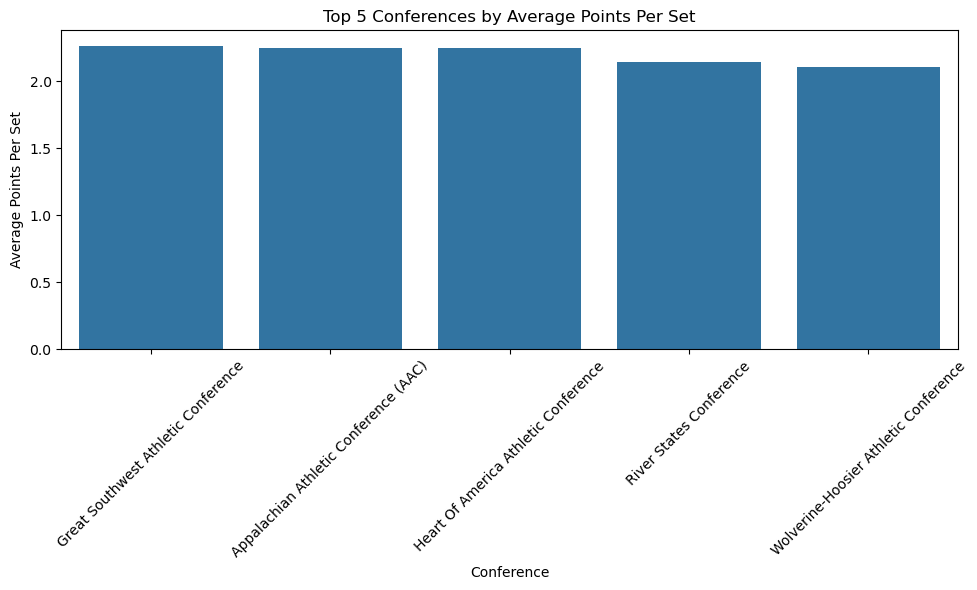

In [23]:
# Calculate the average Points Per Set for each conference
conference_avg = df.groupby('Conference')['Total Points Per Set'].mean().reset_index()

# Sort by Points Per Set in descending order
conference_avg = conference_avg.sort_values('Total Points Per Set', ascending=False)

# Display the top 5 conferences
top_5_conferences = conference_avg.head(5)
print(top_5_conferences)

# visualize results with a bar chart


plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_conferences, x='Conference', y='Total Points Per Set')
plt.title('Top 5 Conferences by Average Points Per Set')
plt.xlabel('Conference')
plt.ylabel('Average Points Per Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

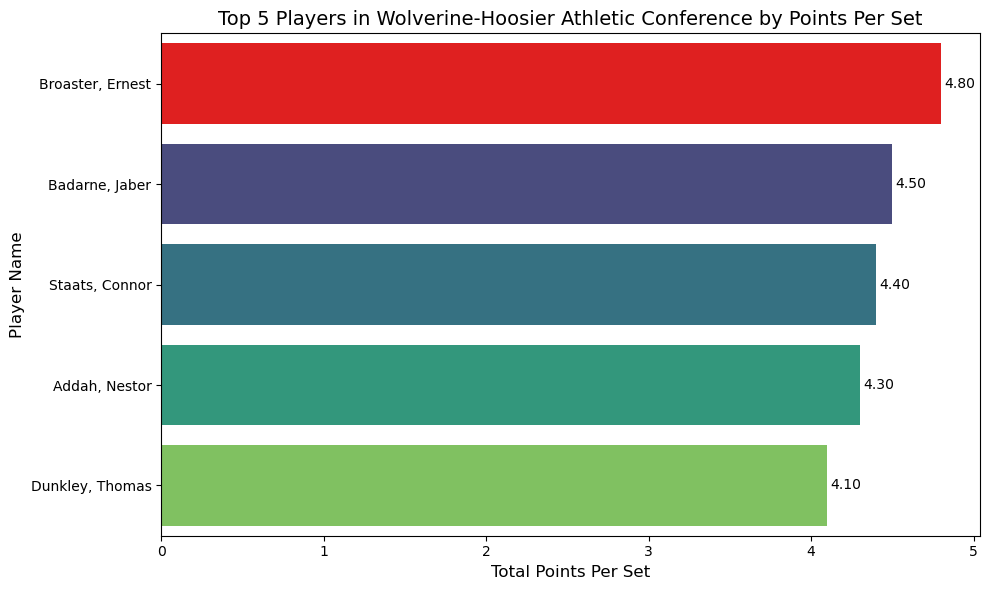

In [25]:
# Displaying the top 5 players based on Points per set in the Wolverine-Hoosier Athletic Conference

# Filter conference
whac_data = df[df['Conference'] == 'Wolverine-Hoosier Athletic Conference']

# Get top 5 players by Points Per Set
top_5_players = (
    whac_data.sort_values('Total Points Per Set', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

# Create custom palette: gold for #1 player, viridis for the rest
colors = ['red'] + sns.color_palette('viridis', n_colors=4)
palette = dict(zip(top_5_players['Name'], colors))

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=top_5_players,
    y='Name',
    x='Total Points Per Set',
    hue='Name',              # explicit hue (future-proof)
    dodge=False,             # no duplicates
    legend=False,            # names are already on axis
    palette=palette          # custom colors
)

# Add value labels
for i, v in enumerate(top_5_players['Total Points Per Set']):
    bars.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

plt.title('Top 5 Players in Wolverine-Hoosier Athletic Conference by Points Per Set', fontsize=14)
plt.xlabel('Total Points Per Set', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.tight_layout()
plt.show()

Top 5 players in Wolverine-Hoosier Athletic Conference across all categories:
                Name  Average_Rank
9      Addah, Nestor        4.1250
15  Broaster, Ernest        6.0000
21   Lopes, Vinicius        6.8125
8     Staats, Connor        7.8750
24    Badarne, Jaber        7.8750


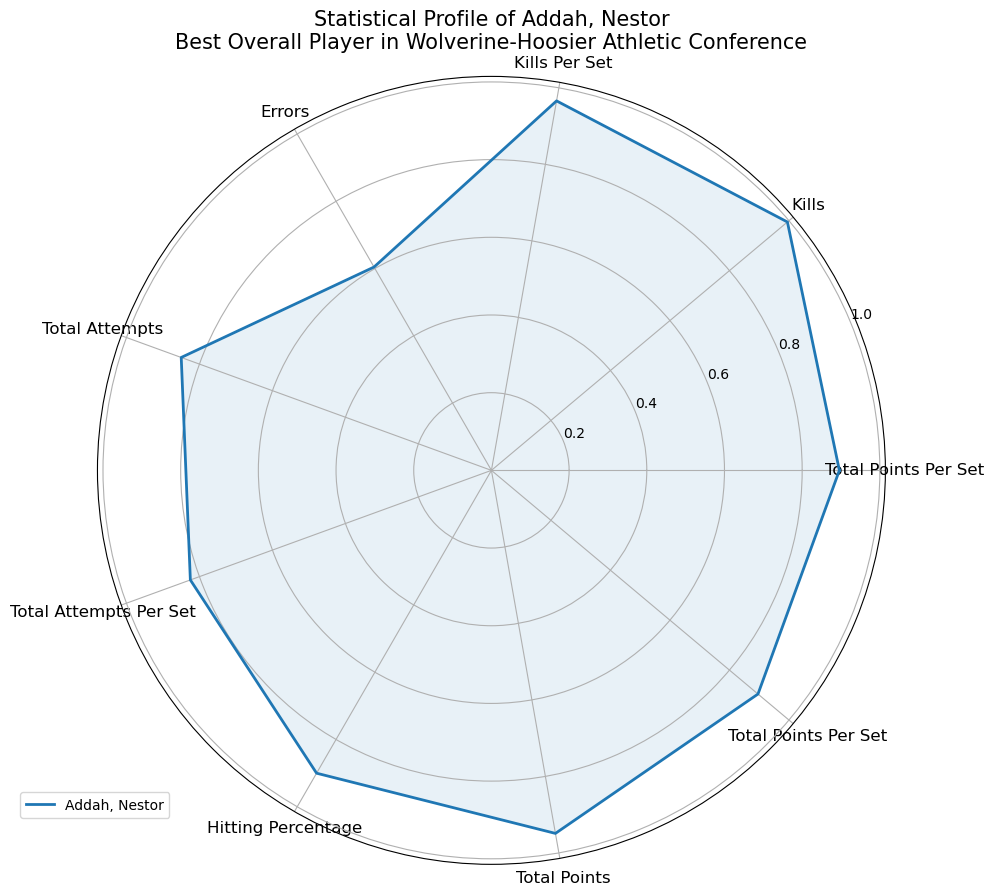

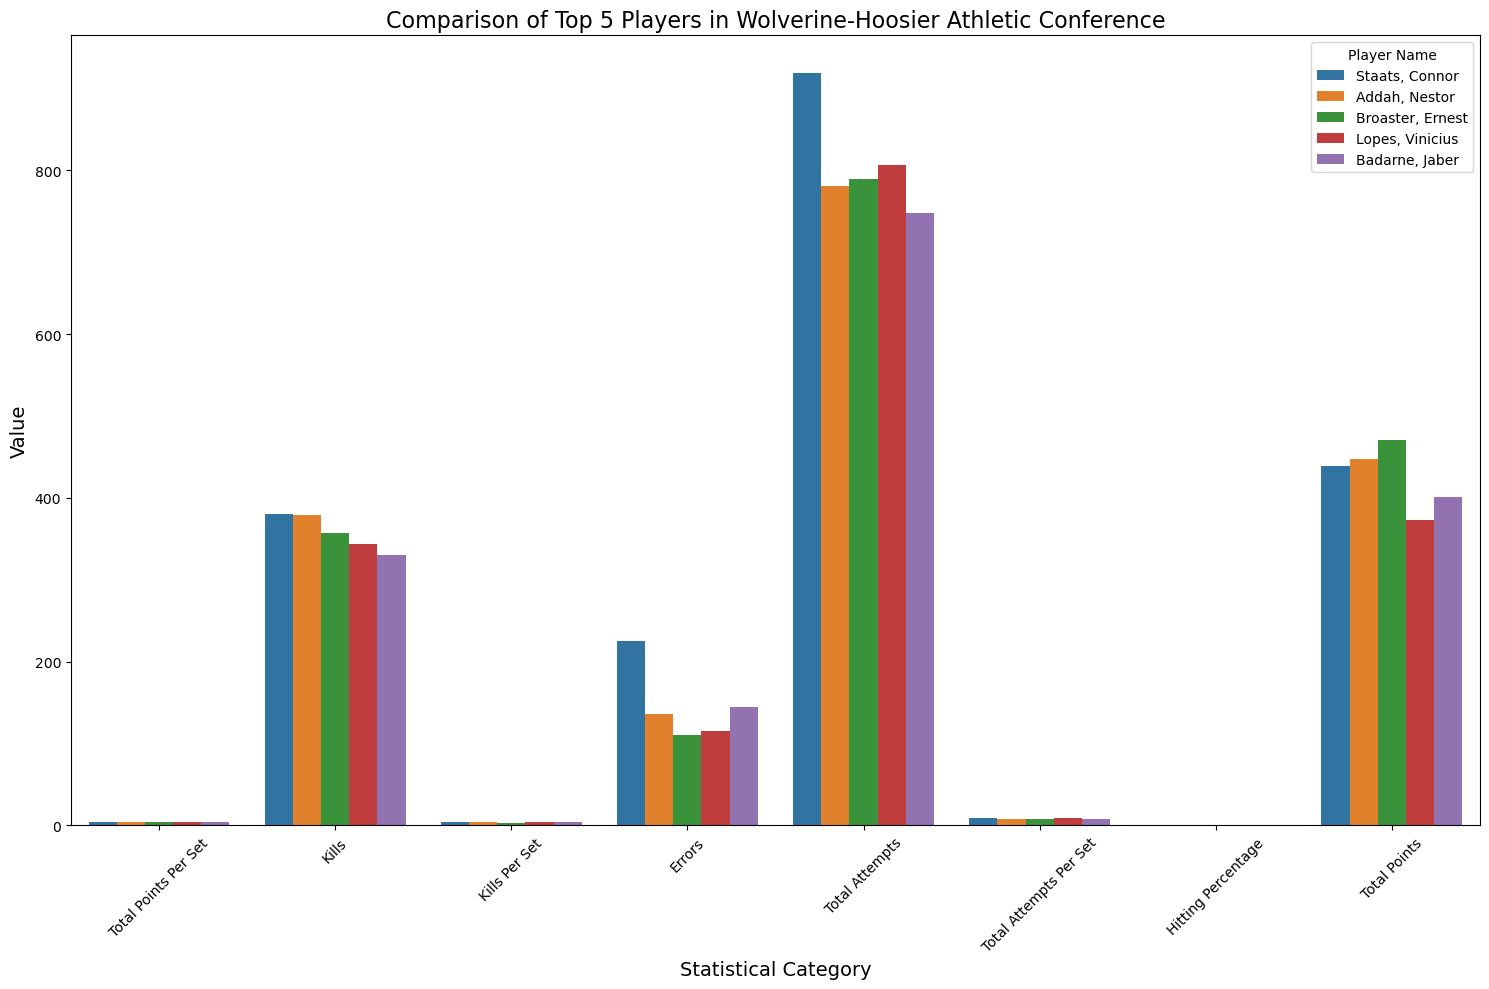

In [27]:
# Identifying the best player in the Wolverine-Hoosier Athletic Conference based on all categories

# Filter for only players in the Wolverine-Hoosier Athletic Conference
whac_data = df[df['Conference'] == 'Wolverine-Hoosier Athletic Conference'].copy()

# Example list of statistical categories - adjust based on your actual columns
stat_columns = ['Total Points Per Set', 'Kills','Kills Per Set','Errors','Total Attempts','Total Attempts Per Set','Hitting Percentage','Total Points','Total Points Per Set']

# Create a ranking for each statistical category within the conference (1 = best)
rankings = pd.DataFrame()

for stat in stat_columns:
    # Create a ranking for this stat (higher values are better)
    rankings[f'{stat}_rank'] = whac_data[stat].rank(ascending=False)

# Add the Name column to the rankings DataFrame
rankings['Name'] = whac_data['Name']

# Calculate the average rank across all categories
rankings['Average_Rank'] = rankings[[col for col in rankings.columns if col.endswith('_rank')]].mean(axis=1)

# Sort by average rank (lower is better)
top_players = rankings.sort_values('Average_Rank')

# Display the top 5 players with the best average rankings
print("Top 5 players in Wolverine-Hoosier Athletic Conference across all categories:")
print(top_players[['Name', 'Average_Rank']].head(5))

# Create a visualization of the top player's stats
best_player_name = top_players['Name'].iloc[0]
best_player_stats = whac_data[whac_data['Name'] == best_player_name][stat_columns].iloc[0]

# Normalize the stats for better visualization
max_stats = whac_data[stat_columns].max()
normalized_stats = best_player_stats / max_stats

# Create the radar chart
categories = stat_columns
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the polygon

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories, size=12)

# Draw the player's stats
values = normalized_stats.tolist()
values += values[:1]  # Close the polygon
ax.plot(angles, values, linewidth=2, linestyle='solid', label=best_player_name)
ax.fill(angles, values, alpha=0.1)

# Add a title
plt.title(f"Statistical Profile of {best_player_name}\nBest Overall Player in Wolverine-Hoosier Athletic Conference", 
          size=15, pad=20)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

# Create a bar chart comparing the top 5 players across categories
top5_names = top_players['Name'].head(5).tolist()
top5_data = whac_data[whac_data['Name'].isin(top5_names)]

# Reshape data for plotting
plot_data = pd.melt(top5_data, 
                    id_vars=['Name'], 
                    value_vars=stat_columns,
                    var_name='Statistic', 
                    value_name='Value')

# Create the grouped bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='Statistic', y='Value', hue='Name', data=plot_data)
plt.title('Comparison of Top 5 Players in Wolverine-Hoosier Athletic Conference', fontsize=16)
plt.xlabel('Statistical Category', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Player Name')
plt.tight_layout()
plt.show()

# Final Analysis Report 